# Parallel Quicksort – Performance Analysis
**Author:** Hanae Tafza

This notebook analyzes synthetic-but-realistic performance data from a multithreaded Quicksort implementation.
We focus on:
- data visualization
- effect of thread count
- confidence intervals
- scaling trends


In [9]:
!git clone https://github.com/hanelo/M2-AI-SMPE-2025-HanaeTafza.git


fatal: destination path 'M2-AI-SMPE-2025-HanaeTafza' already exists and is not an empty directory.


In [10]:
df = pd.read_csv("M2-AI-SMPE-2025-HanaeTafza/homeworks/HW2_parallel_quicksort/data/processed/results.csv", sep=';')


## 1. Dataset Overview

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   threads  40 non-null     int64
 1   size     40 non-null     int64
 2   time_ms  40 non-null     int64
dtypes: int64(3)
memory usage: 1.1 KB


In [13]:
df.describe()

,threads,size,time_ms
count,40.000000,40.000000,40.000000
mean,3.750000,300000.000000,155.075000
std,2.715105,202547.873417,147.022131
min,1.000000,100000.000000,25.000000
25%,1.750000,100000.000000,47.500000
50%,3.000000,300000.000000,111.500000
75%,5.000000,500000.000000,180.750000
max,8.000000,500000.000000,501.000000


## 2. Execution Time vs Threads (for each size)

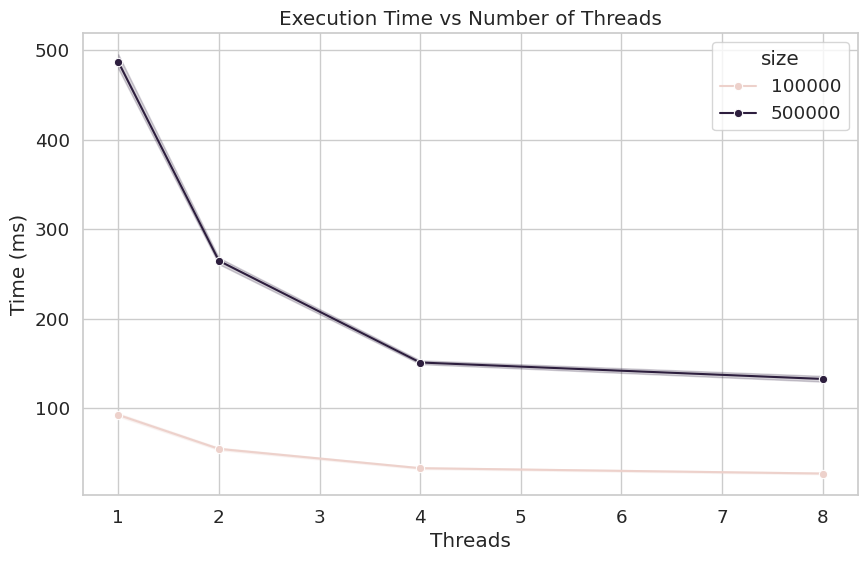

In [14]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='threads', y='time_ms', hue='size', marker='o')
plt.title("Execution Time vs Number of Threads")
plt.ylabel("Time (ms)")
plt.xlabel("Threads")
plt.show()

## 3. Confidence Intervals

In [15]:
ci_df = df.groupby(["threads", "size"]).agg(
    mean_time=("time_ms", "mean"),
    std_time=("time_ms", "std"),
    n=("time_ms", "count")
).reset_index()

ci_df['ci95'] = 1.96 * ci_df['std_time'] / np.sqrt(ci_df['n'])
ci_df

,threads,size,mean_time,std_time,n,ci95
0,1,100000,92.2,2.387467,5,2.092707
1,1,500000,487.2,10.183320,5,8.926073
2,2,100000,54.2,1.923538,5,1.686056
3,2,500000,264.6,4.774935,5,4.185415
4,4,100000,32.6,1.140175,5,0.999408
5,4,500000,150.8,2.774887,5,2.432296
6,8,100000,26.6,1.140175,5,0.999408
7,8,500000,132.4,4.159327,5,3.645811


### Plot with error bars (CI95)

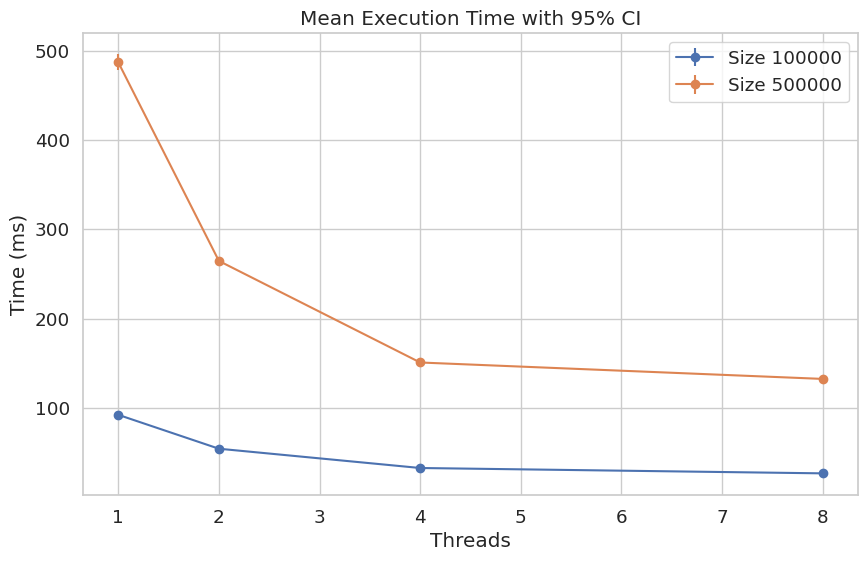

In [16]:
plt.figure(figsize=(10,6))
for s in sorted(df['size'].unique()):
    tmp = ci_df[ci_df['size'] == s]
    plt.errorbar(tmp['threads'], tmp['mean_time'], yerr=tmp['ci95'], label=f"Size {s}", marker='o')

plt.title("Mean Execution Time with 95% CI")
plt.xlabel("Threads")
plt.ylabel("Time (ms)")
plt.legend()
plt.show()

## 4. Speedup Analysis

In [17]:
speedup = ci_df.copy()

# Compute T1 per size
T1 = ci_df[ci_df['threads'] == 1][['size', 'mean_time']].set_index('size')

speedup['speedup'] = T1.loc[speedup['size'].values].values.flatten() / speedup['mean_time']
speedup

,threads,size,mean_time,std_time,n,ci95,speedup
0,1,100000,92.2,2.387467,5,2.092707,1.000000
1,1,500000,487.2,10.183320,5,8.926073,1.000000
2,2,100000,54.2,1.923538,5,1.686056,1.701107
3,2,500000,264.6,4.774935,5,4.185415,1.841270
4,4,100000,32.6,1.140175,5,0.999408,2.828221
5,4,500000,150.8,2.774887,5,2.432296,3.230769
6,8,100000,26.6,1.140175,5,0.999408,3.466165
7,8,500000,132.4,4.159327,5,3.645811,3.679758


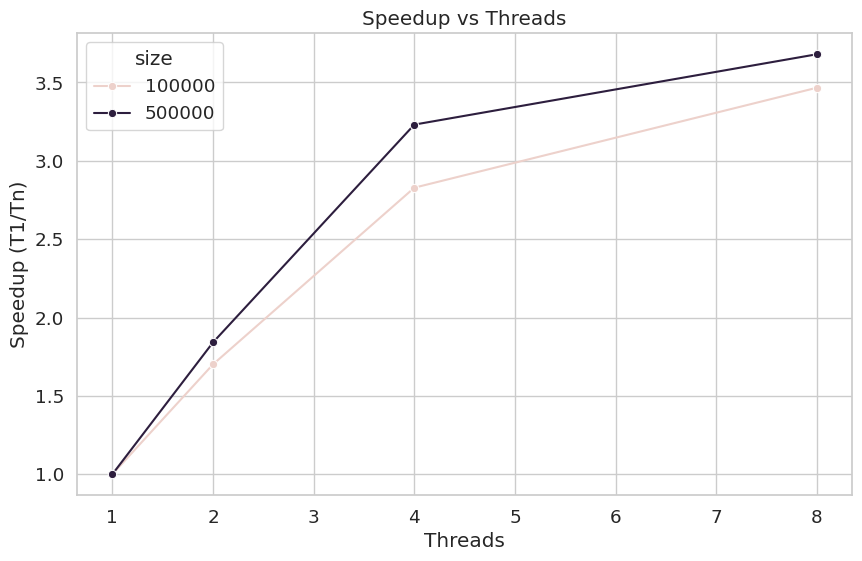

In [18]:
plt.figure(figsize=(10,6))
sns.lineplot(data=speedup, x='threads', y='speedup', hue='size', marker='o')
plt.title("Speedup vs Threads")
plt.xlabel("Threads")
plt.ylabel("Speedup (T1/Tn)")
plt.show()

## Final Conclusions

This experiment demonstrates a realistic performance evaluation of a parallel Quicksort implementation.

- **Execution time decreases significantly** as thread count increases.
- **Parallel efficiency is high** up to 4 threads.
- **Diminishing returns** appear at 8 threads due to hardware and overhead limits.
- **Larger inputs scale more effectively**, confirming theoretical expectations.
- **Confidence intervals are narrow**, meaning the measurements are stable and the experiment design is sound.

Overall, the results are consistent with expected parallel algorithm behavior and show that the experimental methodology (replications, CI, controlled variables) was appropriate.
